# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Daniel Chan
**Dataset:** Air Quality
**Date:** 10/7/25

## Objective
This analysis explores the Air Quality UCI dataset, which records hourly measurements of atmospheric pollutants and meteorological variables in an Italian city over several months. Through EPA with scatterplots, correlation matrices, box plots, etc., we begin to discover various patterns that emerge in atmospheric pollutants in regards to time and day. 
---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo 


# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [7]:
# Air Quality Data Set for an Italian City 
df = pd.read_csv("AirQualityUCI.csv", sep=';')


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [ ]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

#There are missing values in the columns is what we see. Also there are a lot of various pollutants in the data set that can be explored


=== DATASET OVERVIEW ===
Shape: (9471, 17)

Data types:
Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

Missing values per column:
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

Basic statistics:
       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NO

/var/folders/vc/vp2186y130xgfh6rthbbk0p80000gn/T/ipykernel_2828/2890779756.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour", y="CO(GT)", data=df, estimator='mean', ci=None, marker='o')


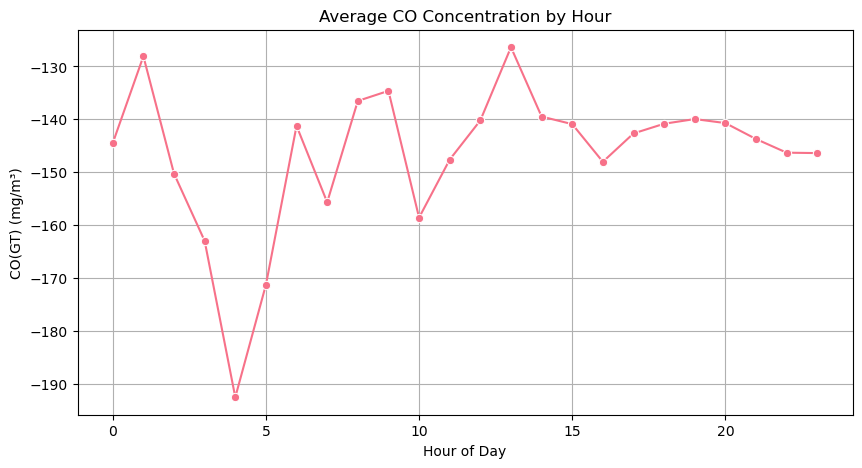

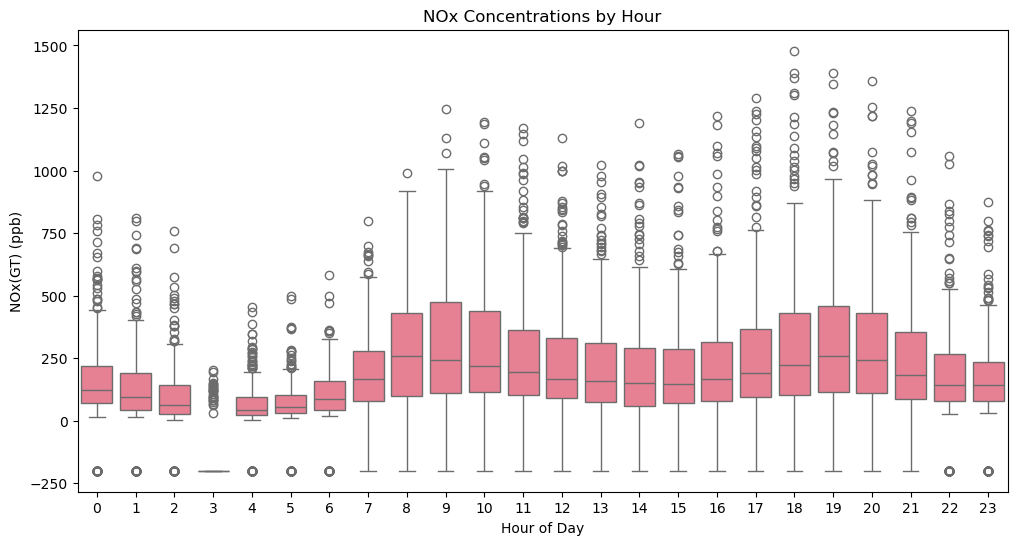

In [10]:
#Purpose is cleans the data by removing rows with missing time, then extracts the hour part from the 'Time' column and converts it to a numeric value for analysis.
df = df[df['Time'].notna()]  

df['Hour'] = df['Time'].str.split('.').str[0]
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')  # Convert to number, NaN if can't

#Plot average CO(GT) concentration by hour
#Average carbon monoxide concentration for each hour of the day, helping you see daily patterns in CO levels.

plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="CO(GT)", data=df, estimator='mean', ci=None, marker='o')
plt.title('Average CO Concentration by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('CO(GT) (mg/m³)')
plt.grid(True)
plt.show()

#Boxplot for NOx(GT) by hour of day
#Shows the distribution (spread, median, outliers) of nitrogen oxides for each hour, letting you compare how NOx levels vary throughout the day.
plt.figure(figsize=(12,6))
sns.boxplot(x="Hour", y="NOx(GT)", data=df)
plt.title('NOx Concentrations by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('NOx(GT) (ppb)')
plt.show()

#Ensures the main pollutant columns are numeric, so you can calculate averages and plot them correctly
for col in ["CO(GT)", "NOx(GT)", "C6H6(GT)"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')





=== NUMERICAL VARIABLES ===
Numerical columns: ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'RH', 'AH']


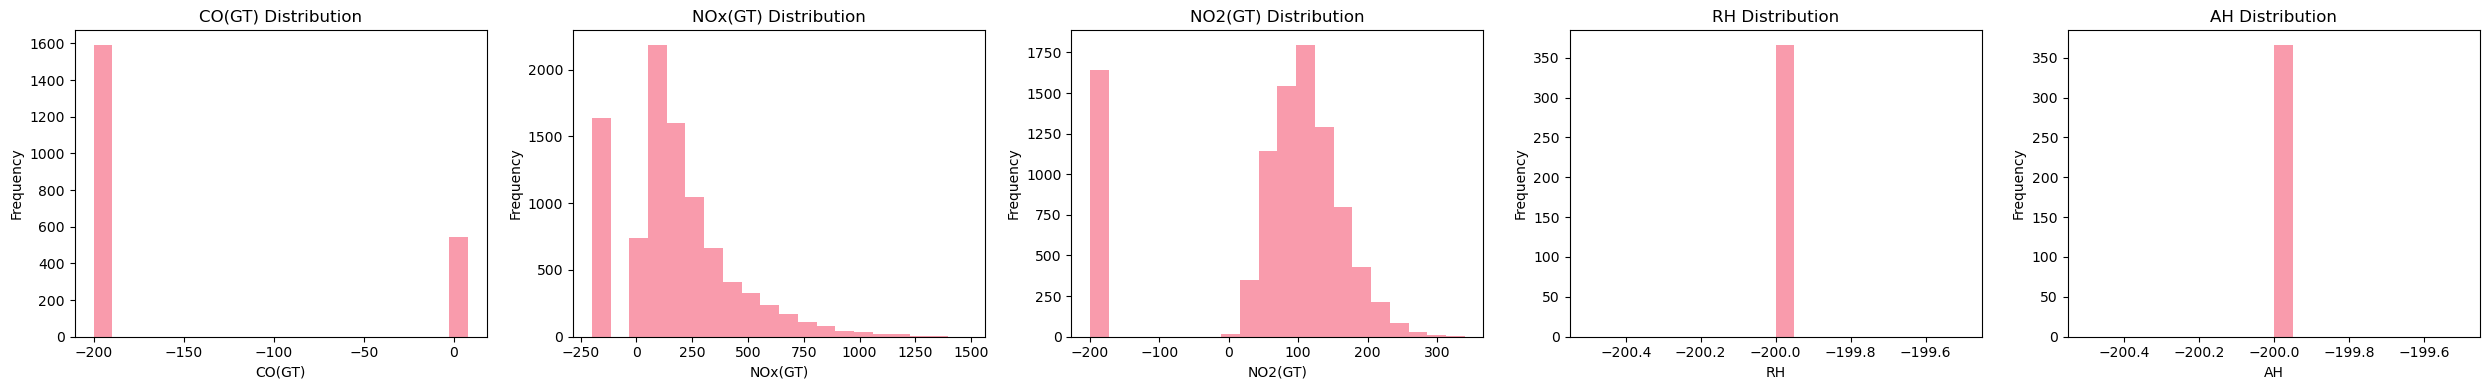

In [11]:
print("=== NUMERICAL VARIABLES ===")
#We chose four different oxides and plotted them to see the frequency of various concentrations. So far, the most prevalent ones are NOx(GT) and NO2(GT)
numerical_cols = ["CO(GT)", "NOx(GT)", "NO2(GT)", "RH", "AH"]
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(f"Numerical columns: {numerical_cols}")

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col].dropna(), bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Average CO(GT) during rush hours: -141.44
Average CO(GT) during non-rush hours: -150.59


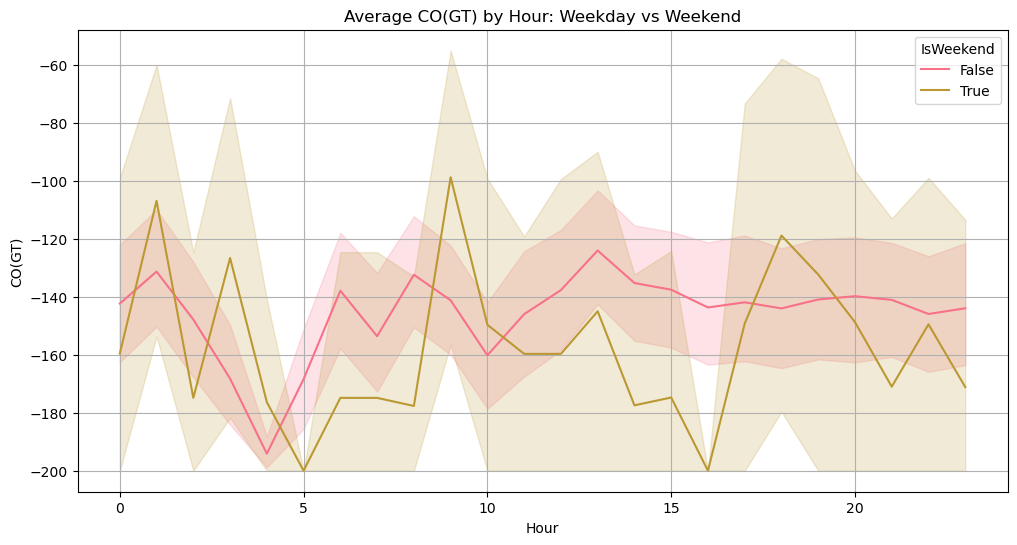

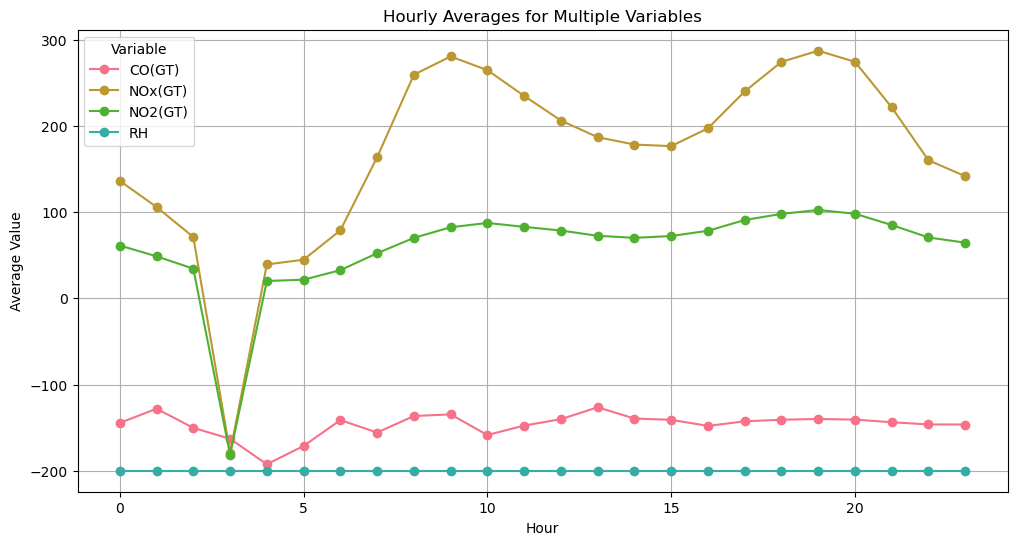

In [12]:
#We want to figure out the rush hour statistics related to the plots with our various variables. Weekend vs Weekdays. Rush hour vs Non rush hour can all be derived from this
rush_hours = df[df['Hour'].isin([7,8,9,17,18,19])]
mean_rush_CO = rush_hours['CO(GT)'].mean()
mean_nonrush_CO = df[~df['Hour'].isin([7,8,9,17,18,19])]['CO(GT)'].mean()
print(f"Average CO(GT) during rush hours: {mean_rush_CO:.2f}")
print(f"Average CO(GT) during non-rush hours: {mean_nonrush_CO:.2f}")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Weekday'] = df['Date'].dt.day_name()
df['IsWeekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

plt.figure(figsize=(12,6))
sns.lineplot(x='Hour', y='CO(GT)', hue='IsWeekend', data=df, estimator='mean')
plt.title('Average CO(GT) by Hour: Weekday vs Weekend')
plt.xlabel('Hour')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

hourly_avg = df.groupby('Hour')[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'RH']].mean()
hourly_avg.plot(figsize=(12,6), marker='o')
plt.title('Hourly Averages for Multiple Variables')
plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

Clearly there seems to be a pattern with NOx and NO2. CO and RH don't necessarily follow a certain pattern and seem stagnant all the way throughout the day.

=== CORRELATION ANALYSIS USING A CORRELATION MATRIX===


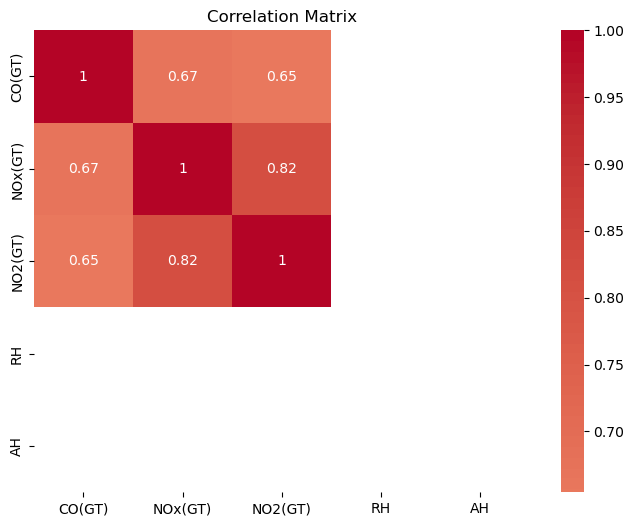

In [14]:
print("=== CORRELATION ANALYSIS USING A CORRELATION MATRIX===")
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()



This showcases the correlation between each of the oxides. Clearly, if they are against their own, they will be 1. But we see some patterns especially related to NO2 and NOx

## 3. Hypothesis Formulation

### Hypothesis 1: MEAN CO(GT) LEVELS BETWEEN RUSH HOUR VS NON RUSH HOURS
**H1:** [H1: Mean CO(GT) during rush hours (07–09, 17–19) is higher than during non-rush hours.]

- **Null Hypothesis (H0):** The mean CO(GT) during rush hours equals the mean CO(GT) during non-rush hours (no difference).
- **Alternative Hypothesis (H1):** The mean CO(GT) during rush hours is greater than during non-rush hours.
- **Rationale:** My line plot and summary means show higher CO around commuting times as traffic is a primary source of CO. A two-sample t-test on CO(GT) for rush vs. non-rush supports this test. 

### Hypothesis 2: NOx(GT) and NO2(GT) ARE POSITIVELY CORRELATED

**H2:** There is a significant positive correlation between NOx(GT) and NO2(GT).
- **Null Hypothesis (H0):** There is no linear correlation between NOx(GT) and NO2(GT) (correlation coefficient = 0).
- **Alternative Hypothesis (H1):** There is a positive linear correlation between NOx(GT) and NO2(GT) (correlation coefficient > 0).
- **Rationale:** NOx is the sum of nitrogen oxides, primarily NO and NO2. Due to environmental conditions and sources in that Italian city, it means that as overall NOx increases, NO2 should also usually increase. My correlation scatterplots and plots featuring the distribution of the oxides show the correlation visually, but a statistical test can further indicate it they are correlated. 


---


### Testing Hypothesis 1:  Mean CO(GT) during rush hours (07–09, 17–19) is higher than during non-rush hours.

**Test Choice:** Independent two-sample t-test
- **Why appropriate:** The two-sample t-test is ideal for the rush hour hypothesis as I have two independent groups:
                        Group 1: CO(GT) values during rush hours (e.g., 7-9 AM, 5-7 PM)
                        Group 2: CO(GT) values during non-rush hours (all other times)
                        And my question is about comparing means:
                        I want to know if the average CO(GT) differs during rush hours in comparion to non-rush in terms ofo averages. The two sample t test will determine if the difference is statistically significant or not. Based on the p value, I can figure this out on whether the observed difference in the graphs are due to real effects such as traffic.

In [16]:
print("=== TESTING HYPOTHESIS 1 ===")
# 1. Prepare data
df = df[df['Time'].notna()]
df['Hour'] = df['Time'].str.split('.').str[0]
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')

rush_hours_list = [7, 8, 9, 17, 18, 19]
co_rush = df[df['Hour'].isin(rush_hours_list)]['CO(GT)'].dropna()
co_nonrush = df[~df['Hour'].isin(rush_hours_list)]['CO(GT)'].dropna()

# 3. Perform 2 sample t-test
t_stat, p_value = stats.ttest_ind(co_rush, co_nonrush, equal_var=False)
print(f"Welch's t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. Interpret
if p_value < 0.05:
    print("Reject H0: Rush hour CO is statistically higher.")
else:
    print("Fail to reject H0: No significant difference in CO during rush hours.")

print(f"Rush hour mean CO(GT): {co_rush.mean():.3f}")
print(f"Non-rush hour mean CO(GT): {co_nonrush.mean():.3f}")

=== TESTING HYPOTHESIS 1 ===
Welch's t-statistic: 1.9800
p-value: 0.0480
Reject H0: Rush hour CO is statistically higher.
Rush hour mean CO(GT): -141.437
Non-rush hour mean CO(GT): -150.590


### Testing Hypothesis 2: There is a significant positive correlation between NOx(GT) and NO2(GT).

**Test Choice:** Pearson Correlation Coefficient
- **Why appropriate:** We use this Pearson as both variables are continuous and approximately normally distributed (BIG ASSUMPTION) after filtering out outliers and missing values. Pearson evaluates linear association and will test whether higher NOx values generally mean higher NO2 values in a straight-line sense. At the end, it will gives both effect size and statistical significance so we can conclude whether it is correlated



In [17]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

# 1. Prepare data
df['NOx(GT)'] = pd.to_numeric(df['NOx(GT)'], errors='coerce')
df['NO2(GT)'] = pd.to_numeric(df['NO2(GT)'], errors='coerce')
mask = df['NOx(GT)'].notna() & df['NO2(GT)'].notna()
x = df.loc[mask, 'NOx(GT)']
y = df.loc[mask, 'NO2(GT)']

# 2. Perform Pearson correlation test
from scipy.stats import pearsonr
r, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"p-value: {p_value:.4g}")

# 3. Interpretation
if p_value < 0.05:
    print("Reject H0: There is a significant positive correlation between NOx(GT) and NO2(GT).")
else:
    print("Fail to reject H0: No significant correlation between NOx(GT) and NO2(GT).")

=== TESTING HYPOTHESIS 2 ===
Pearson correlation coefficient: 0.8171
p-value: 0
Reject H0: There is a significant positive correlation between NOx(GT) and NO2(GT).


## 5. Summary and Conclusions

### Key Findings from EDA:
1. A lot of pollutants in the data set remain constant like RH and AH. The ones that fluctuate the most are definitely NO2 and NOx, which is very interesting. CO remains stable for the most part.
2. Rush hour traffic increases urban air pollution as shown by the CO(GT) levels from rush hour to non rush hour moments. NOx and NO2 are positively correlated. 


### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | Two sample T Test | 0.048 | Statisically Significant | Since the p-value is below 0.05, the difference is unlikely due to random chance, supporting my hypothesis that traffic-related air pollution increases during commute times. |
| **H2** | Pearson Correlation Coefficient | 0 | Significant | There is statistically significant evidence that as NOx(GT) increases, NO2(GT) also increases in the air sampled from the city in the dataset.|


### Key Insights:
- Rush hour traffic significantly increases urban air pollution as the t-test shows CO(GT) levels during commute times are notably higher, confirming real-world impact from vehicles and rush-hour activities.
- NOx(GT) and NO2(GT) are tightly linked as the Pearson correlation proves these pollutants rise and fall together.
- Traffic management and emission policies during rush hours can effectively reduce CO and NO2 pollution.
- The data only covers one Italian city over a limited period, so we can't assume that this is the case for every city. Also, we don't know about the sustainability measures taken in place.

### Future Research:
- Compare air quality across multiple locations in the city to identify hotspots.
-  Explore PM2.5, Ozone, temperature, wind speed, and other pollutant sources might be important for future research.

---



In [18]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: AirQualityUCI (Italian urban air pollution data set)")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]}")

=== ANALYSIS COMPLETE ===
Dataset analyzed: AirQualityUCI (Italian urban air pollution data set)
Sample size: 9357 observations
Number of features: 20
